Create a property graph of the files on folders in a given folder

In [1]:
import glob

https://stackoverflow.com/questions/2186525/use-a-glob-to-find-files-recursively-in-python

In [2]:
for filename in glob.iglob('./**/*', recursive=True):
    print(filename)

./cost-benefit_break_even_point_for_labor.ipynb
./files_and_folders.ipynb
./graph_of_site_links.ipynb
./graphviz_for_static_graph_visualization.ipynb
./hero-network.csv
./hero-network.csv.source
./marvel_characters.ipynb
./networkx.ipynb
./py2neo.ipynb
./source.csv
./source.csv.source
./test-output
./test-output/round-table.gv


glob doesn't support hidden directories :(

https://docs.python.org/3/library/glob.html

<BR>
<BR>
<BR>

So instead recursively enter every directory

https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python

In [11]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [12]:
list_files('.')

./
    cost-benefit_break_even_point_for_labor.ipynb
    files_and_folders.ipynb
    graph_of_site_links.ipynb
    graphviz_for_static_graph_visualization.ipynb
    hero-network.csv
    hero-network.csv.source
    marvel_characters.ipynb
    networkx.ipynb
    py2neo.ipynb
    pycallgraph.ipynb
    source.csv
    source.csv.source
    .ipynb_checkpoints/
        cost-benefit_break_even_point_for_labor-checkpoint.ipynb
        files_and_folders-checkpoint.ipynb
        graph_of_site_links-checkpoint.ipynb
        graphviz_for_static_graph_visualization-checkpoint.ipynb
        marvel_characters-checkpoint.ipynb
        networkx-checkpoint.ipynb
        py2neo-checkpoint.ipynb
        pycallgraph-checkpoint.ipynb
    test-output/
        round-table.gv


https://www.quora.com/Whats-the-easiest-way-to-recursively-get-a-list-of-all-the-files-in-a-directory-tree-in-Python

This yields information equivalent to <BR>
!find

In [1]:
from os import walk
path ="." # current directory
for (dirpath, dirnames, filenames) in walk(path):
    print('current location:',dirpath)
    print('folders:         ',dirnames)
    print('files:           ',filenames,'\n')

current location: .
folders:          ['books.toscrape.com', 'test-output', '.ipynb_checkpoints']
files:            ['source.csv', 'graphviz_for_static_directed_graph_visualization.ipynb', 'index.html', 'example1_graph.png', 'py2neo.ipynb', 'files_and_folders.ipynb', 'marvel_characters.ipynb', 'networkx.ipynb', 'graph_of_site_links.ipynb', 'hero-network.csv.source', 'source.csv.source', 'cost-benefit_break_even_point_for_labor.ipynb', 'graphviz_for_static_graph_visualization.ipynb', 'pycallgraph.png', 'hero-network.csv', 'pycallgraph.ipynb'] 

current location: ./books.toscrape.com
folders:          ['static', 'catalogue', 'media']
files:            ['index.html'] 

current location: ./books.toscrape.com/static
folders:          ['oscar']
files:            [] 

current location: ./books.toscrape.com/static/oscar
folders:          ['css', 'js', 'fonts']
files:            ['favicon.ico'] 

current location: ./books.toscrape.com/static/oscar/css
folders:          []
files:            ['da

For more complicated view, look at the parent directory

In [3]:
from graphviz import Digraph, Graph

In [4]:
fld = Digraph(comment='files and folders')

In [18]:
fld.clear()

In [19]:
fld.node('/full/path/to/fldr', 'fldr')
fld.node('B', 'Sir Bedevere the Wise')
fld.node('L', 'Sir Lancelot the Brave')

fld.edge('B', 'L')
fld.edge('B', '/full/path/to/fldr')

In [20]:
print(fld.source)

// files and folders
digraph {
	"/full/path/to/fldr" [label=fldr]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	B -> L
	B -> "/full/path/to/fldr"
}


In [21]:
fld.format = 'png'
fld.render('test-output/fld_test', view=True)

'test-output/round-table.png'

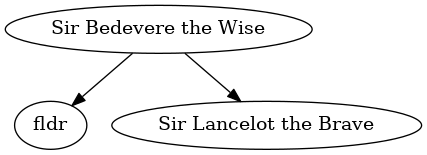

In [22]:
from IPython.display import Image
Image("test-output/fld_test.png")

In [28]:
fld.clear()

path ="." # current directory
for (dirpath, dirnames, filenames) in walk(path):
    fld.node(dirpath, dirpath) # current location
    for this_subfolder in dirnames:
        fld.node(dirpath+'/'+this_subfolder, this_subfolder)
        fld.edge(dirpath, dirpath+'/'+this_subfolder)
    for this_file in filenames:
        fld.node(dirpath+'/'+this_file, this_file)
        fld.edge(dirpath, dirpath+'/'+this_file)

In [29]:
#print(fld.source)

In [30]:
fld.format = 'png'
fld.render('test-output/files_and_folders', view=True)

'test-output/files_an_folders.png'

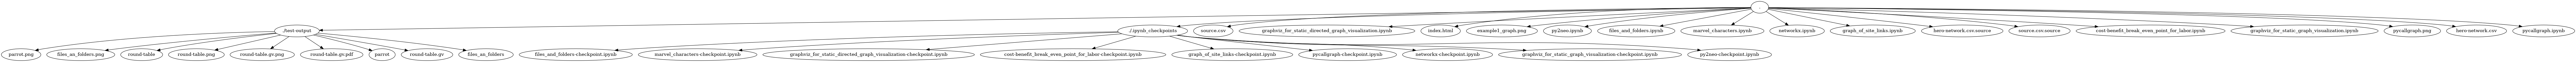

In [31]:
Image("test-output/files_and_folders.png")

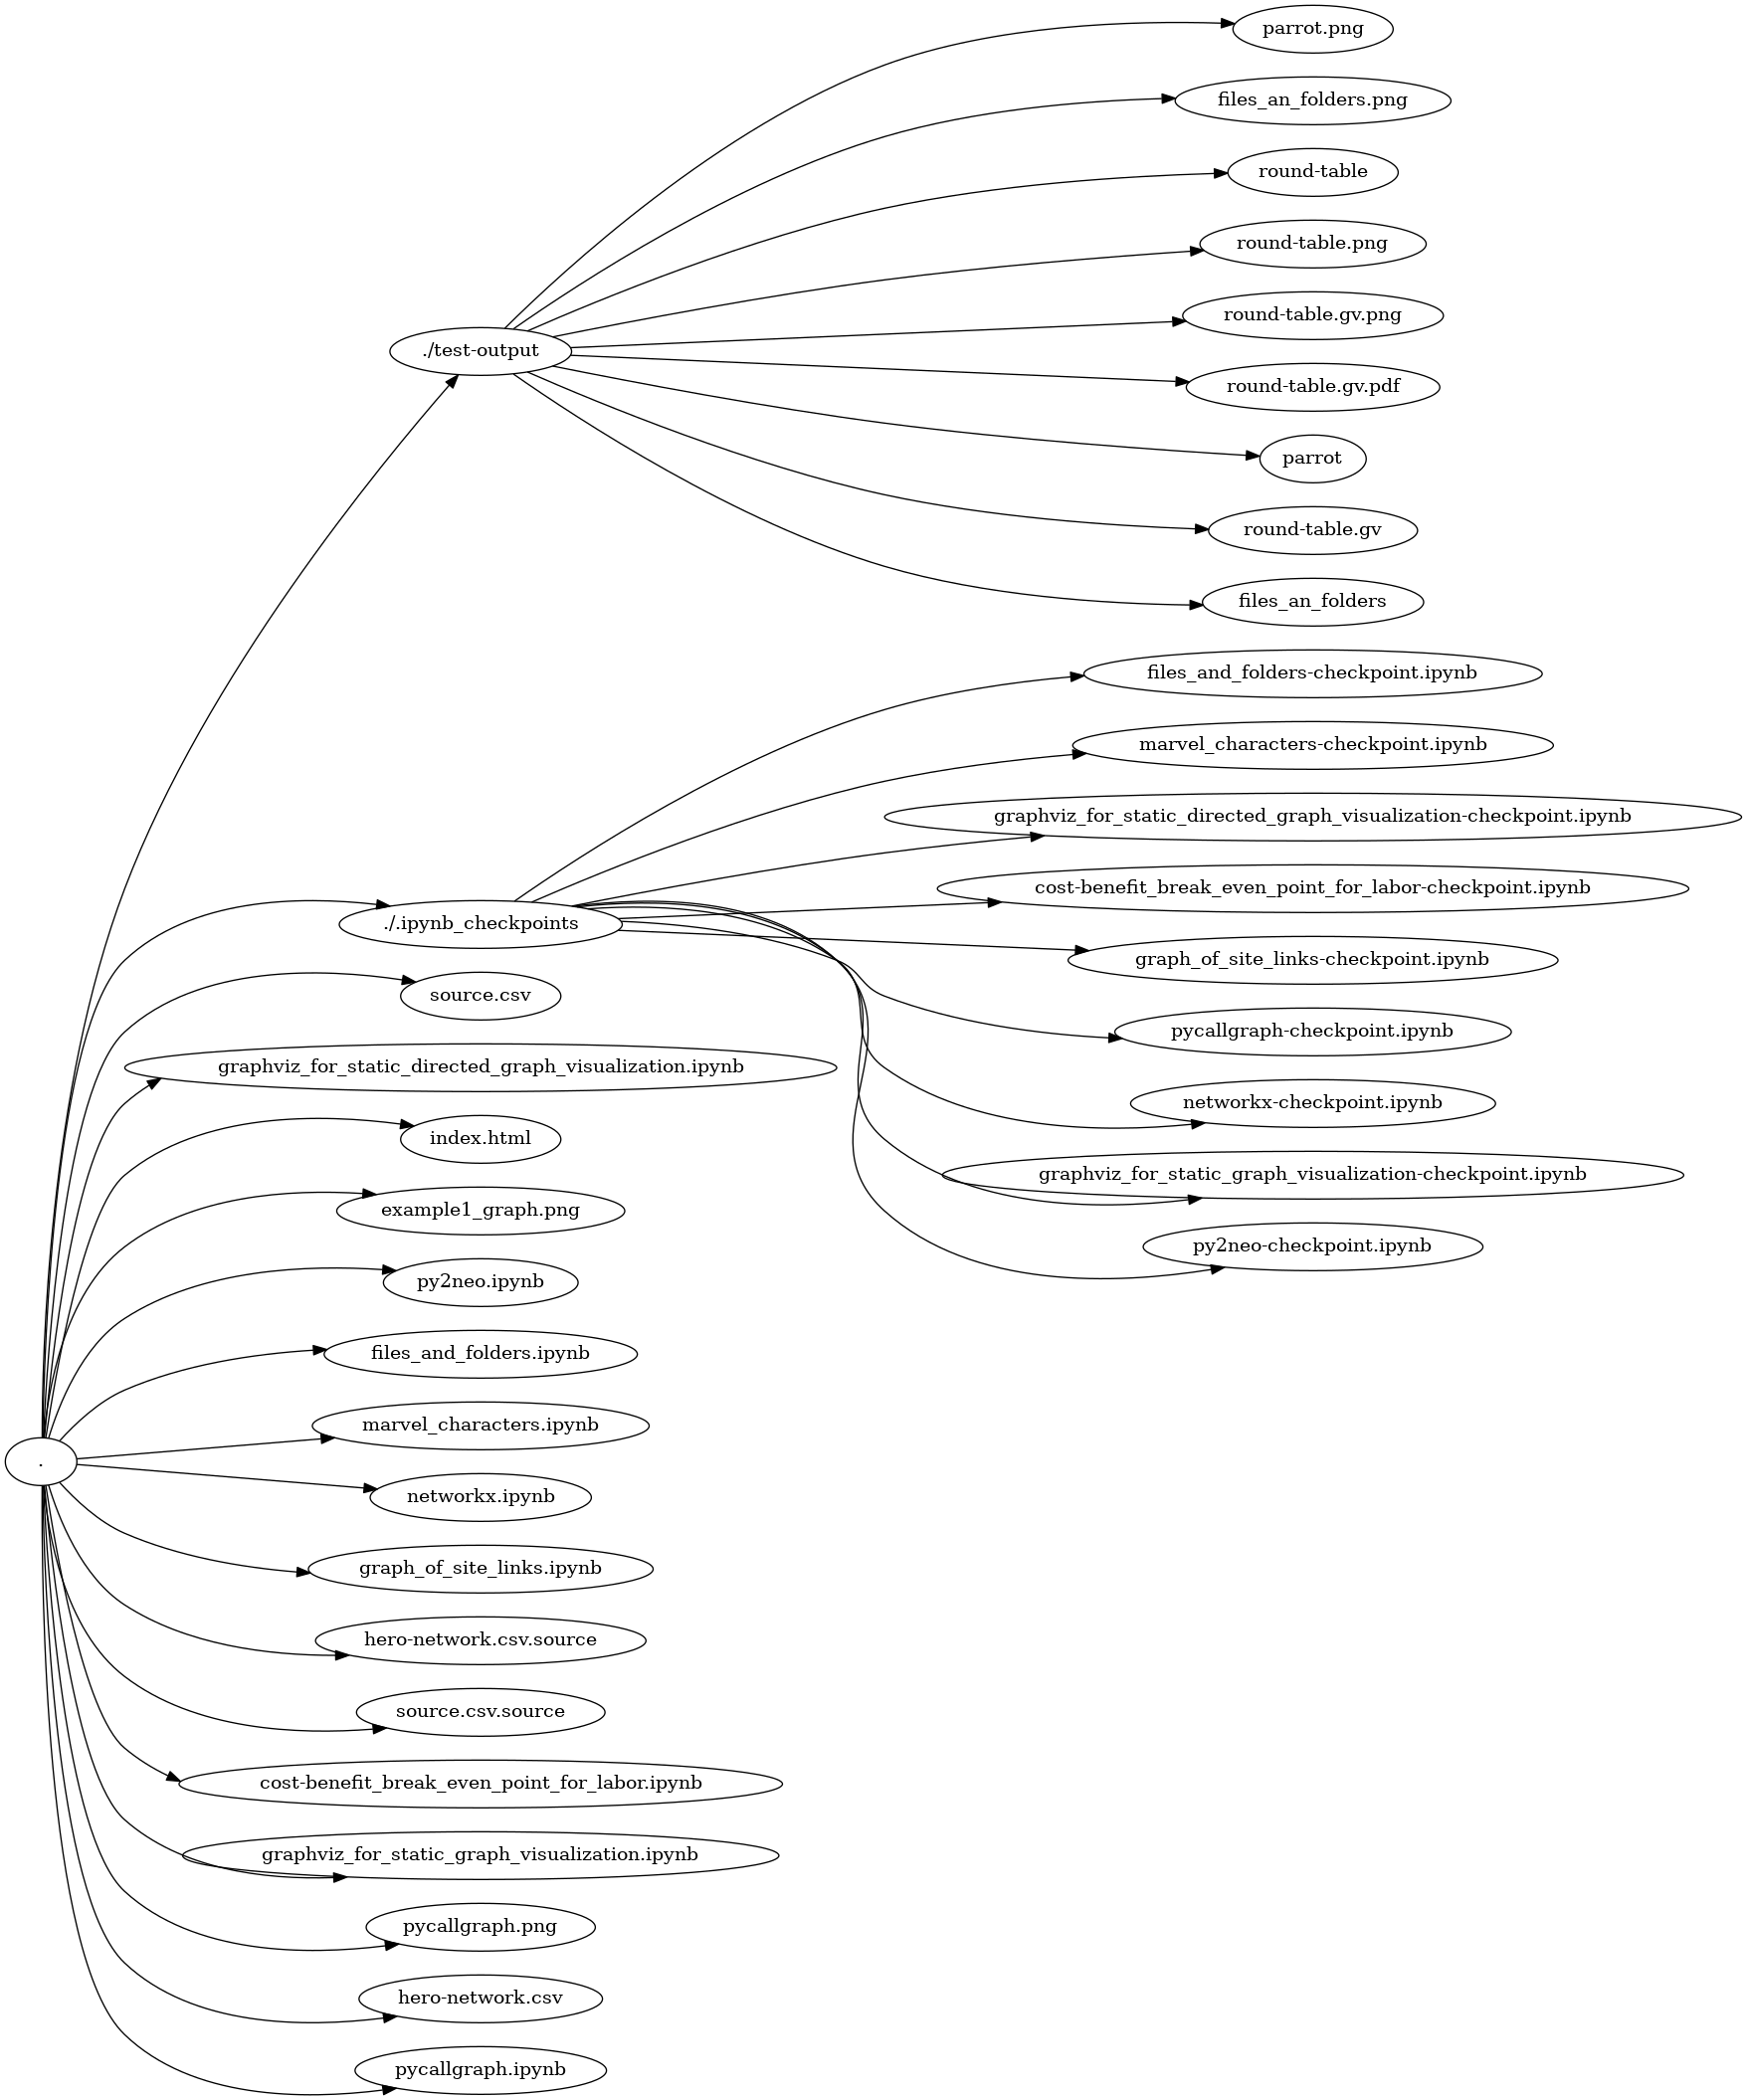

In [32]:
fld.graph_attr['rankdir'] = 'LR'
fld.render('test-output/files_and_folders', view=True)
Image("test-output/files_and_folders.png")

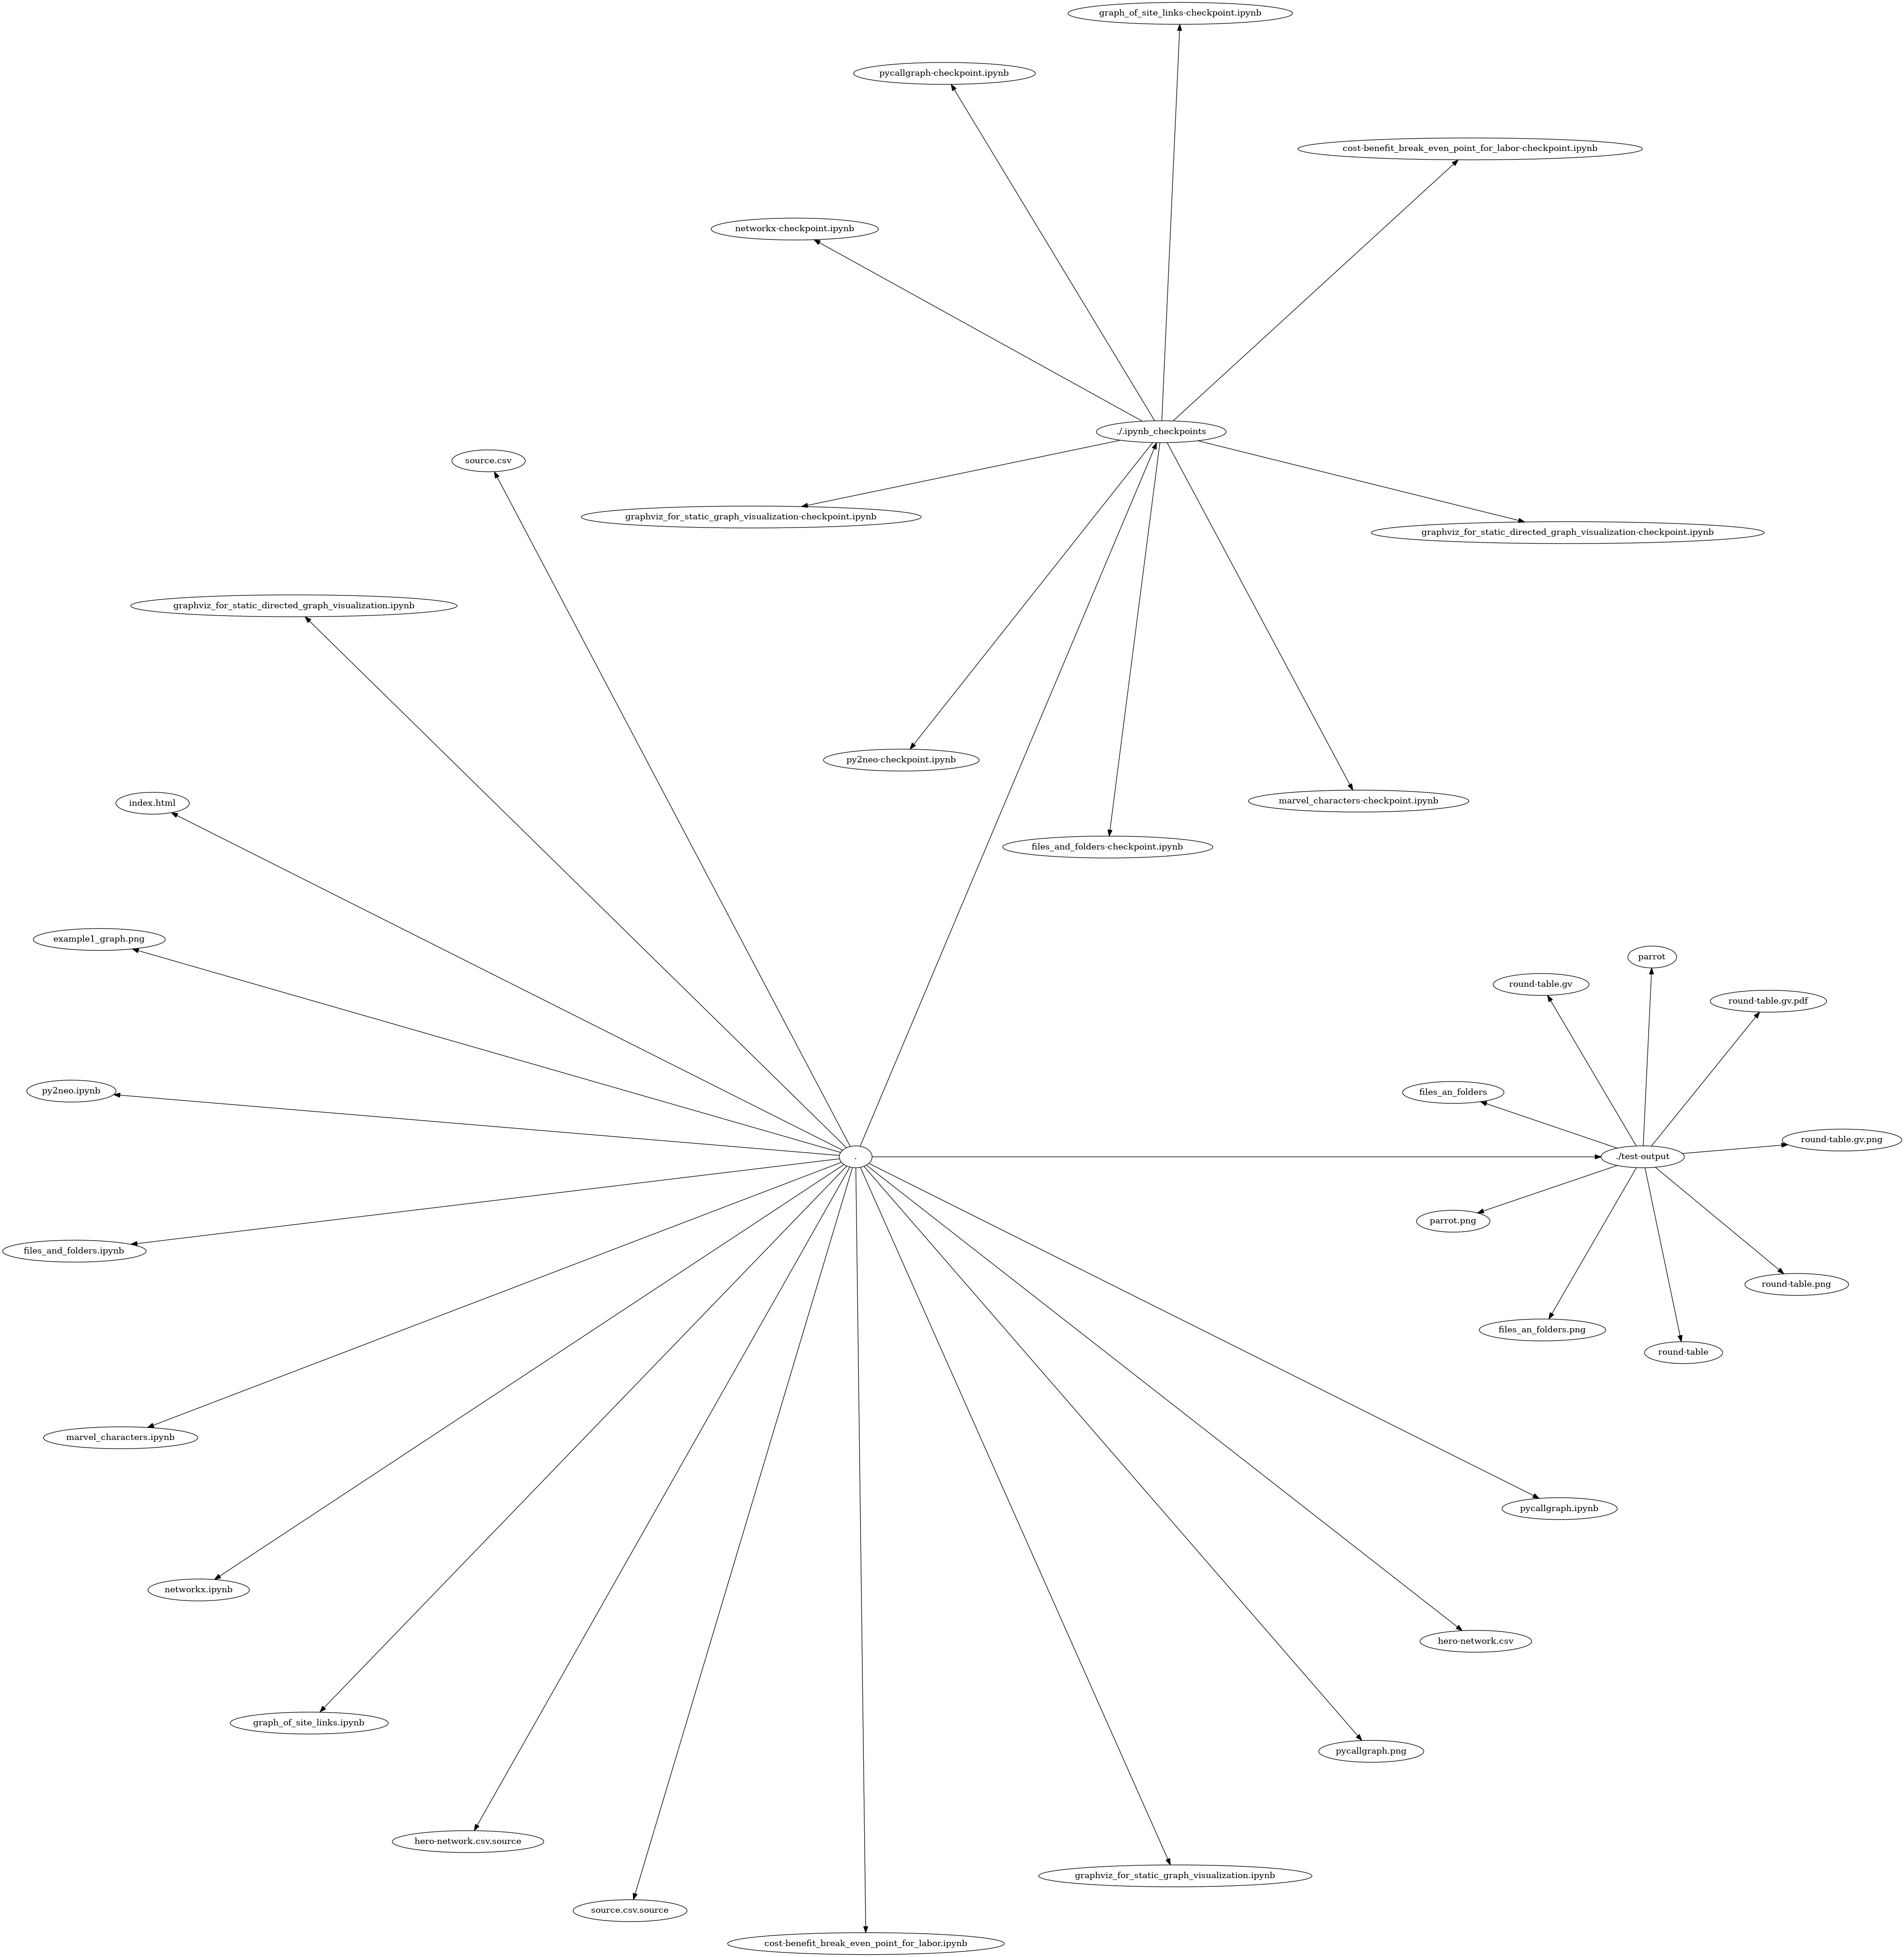

In [33]:
fld.engine = 'circo'
fld.render('test-output/files_and_folders', view=True)
Image("test-output/files_and_folders.png")

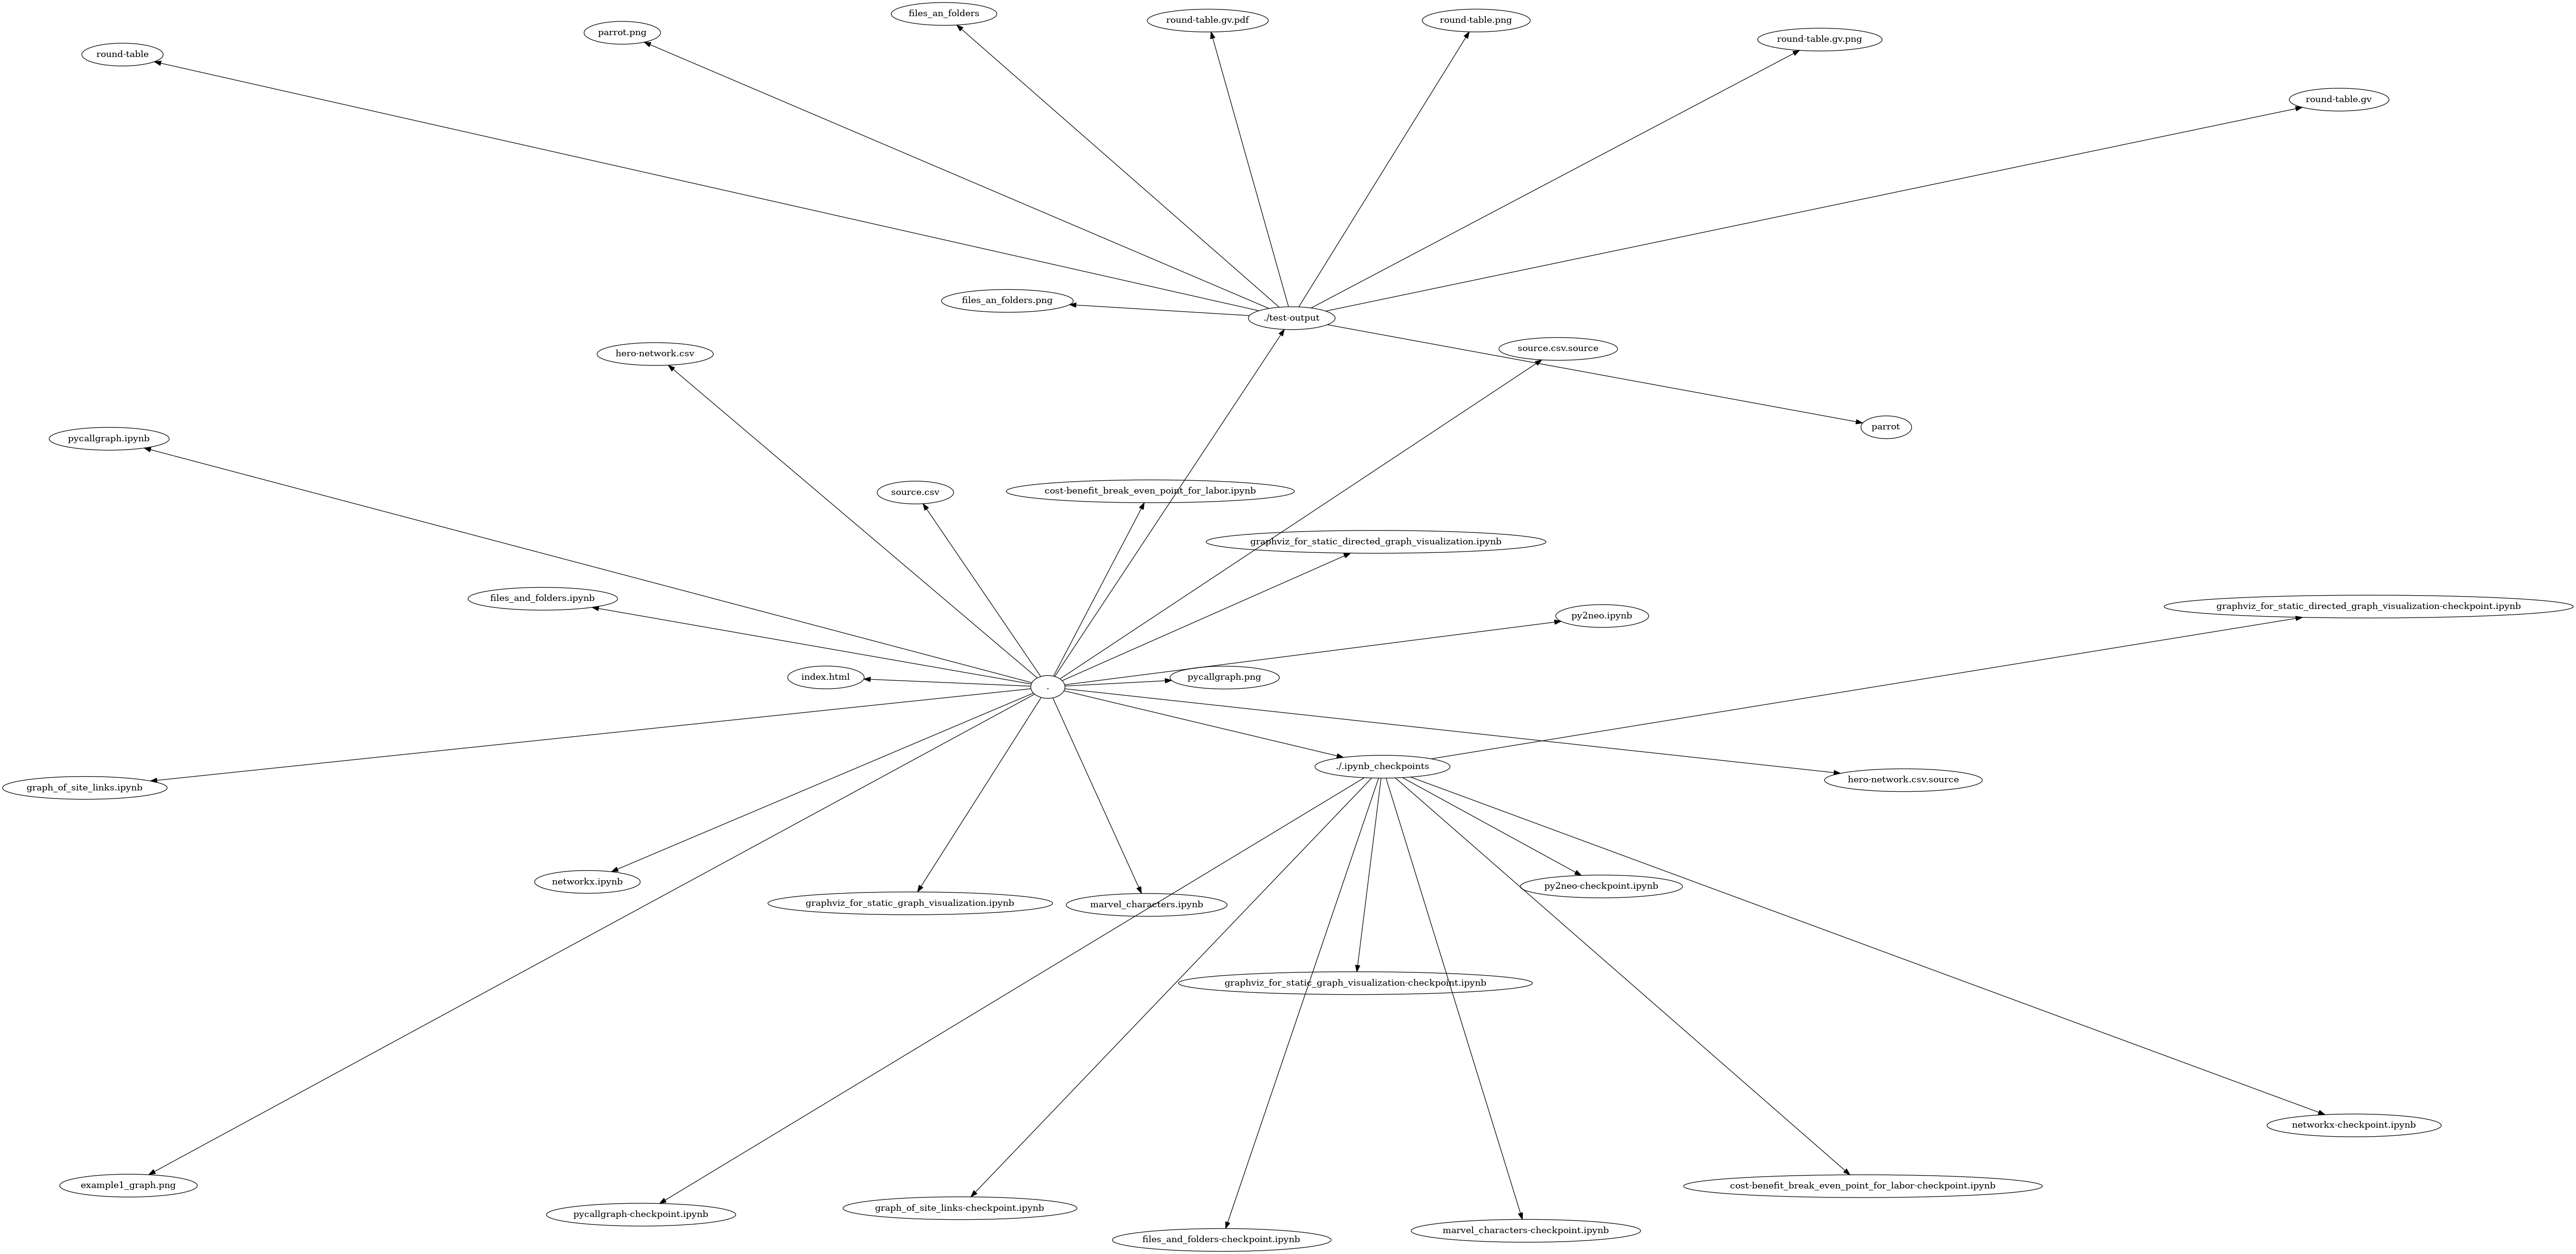

In [37]:
fld.engine = 'neato'#'twopi'
fld.attr(overlap='false')
fld.render('test-output/files_and_folders', view=True)
Image("test-output/files_and_folders.png")